In [1]:
import pandas as pd
import pydytuesday
import arviz as az
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm

In [4]:
# Download files from the week, which you can then read in locally
pydytuesday.get_date('2025-04-15')

Trying to fetch README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-04-15/readme.md
Successfully fetched README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-04-15/readme.md
Successfully saved meta.yaml to C:\Users\alexg\Documents\projects\tidytuesday\week-2025-4-15\meta.yaml
Successfully saved penguins.csv to C:\Users\alexg\Documents\projects\tidytuesday\week-2025-4-15\penguins.csv
Successfully saved penguins_raw.csv to C:\Users\alexg\Documents\projects\tidytuesday\week-2025-4-15\penguins_raw.csv


In [2]:
penguins = pd.read_csv("penguins.csv")
penguins_raw = pd.read_csv("penguins_raw.csv")

## Data Set Exploration penguins.csv

Exploring the nan values we can probably remove entry 3 and entry 271 since they have lttle inforation in regards to bill len and depth. We will try to impute the sex values for the other missing penguins since male and females can proabbly be distinguished based on their body mass and size. We will explore this relationship further.

In [3]:
penguins[penguins.isna().any(axis=1)]

,species,island,bill_len,bill_dep,flipper_len,body_mass,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [4]:
grouped_counts = penguins.groupby(["species", "island"]).size().reset_index(name="count")

In [5]:
pivoted_counts = grouped_counts.pivot(index="species", columns="island", values="count")

In [6]:
pivoted_counts

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44.0,56.0,52.0
Chinstrap,NaN,68.0,NaN
Gentoo,124.0,NaN,NaN


Species seems to be determenistic on their island. Chinstrap penguins are only found on the island of Biscor and Gentoo penguins are only found on the island of Torgersen while Adelie are uniformilly distributed on all other islands.

Text(95.72222222222221, 0.5, 'Species')

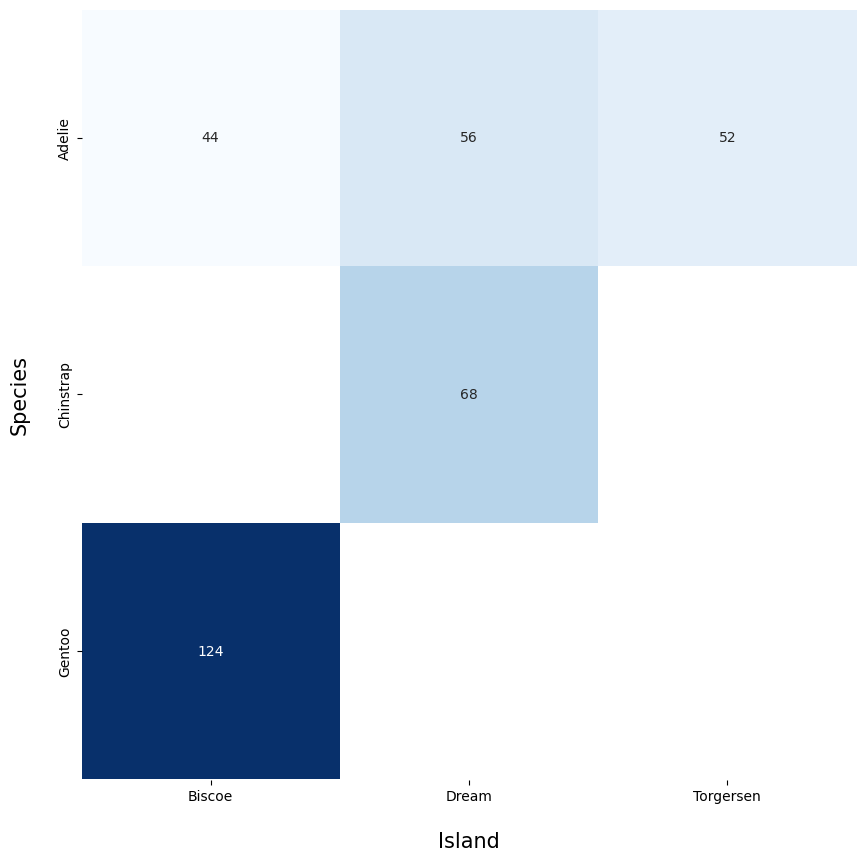

In [7]:
fig = plt.figure(figsize=(10,10))
sn.heatmap(pivoted_counts, annot=True, cmap="Blues", fmt=".3g", cbar=False)
plt.xlabel("Island", fontsize=15, labelpad=20)
plt.ylabel("Species", fontsize=15, labelpad=20)

## How is sex asscoicated with body mass?

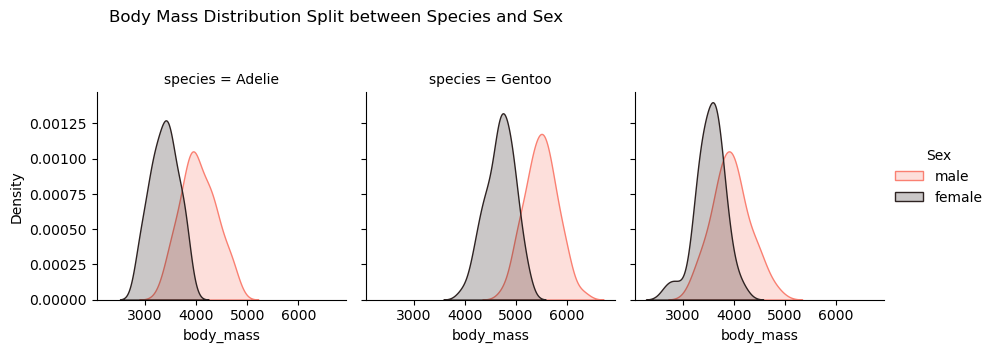

In [14]:
g = sn.FacetGrid(penguins, col="species", hue="sex", palette="dark:salmon_r")
g.map(sn.kdeplot, "body_mass", fill=True, legend=True)
g.add_legend(title="Sex")
plt.title("Body Mass Distribution Split between Species and Sex",y=1.3, x=-1.2);

In [ ]:
# TODO: Difference Test using PyMC

## How is sex and flipper length asscoicated with body mass?

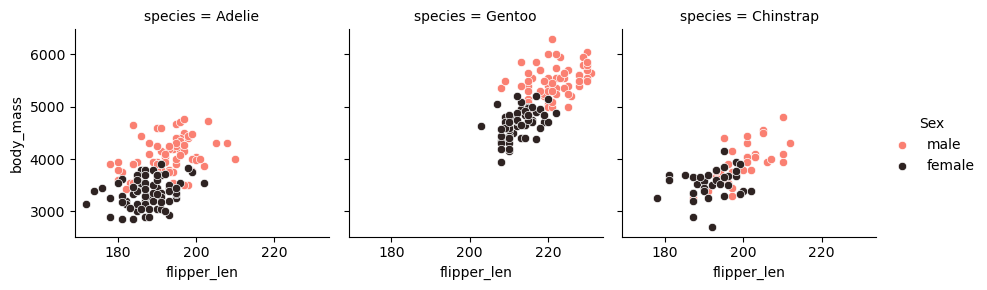

In [35]:
g = sn.FacetGrid(penguins, col="species", hue="sex", palette="dark:salmon_r")
g.map(sn.scatterplot, "flipper_len", "body_mass",legend=True)
g.add_legend(title="Sex")

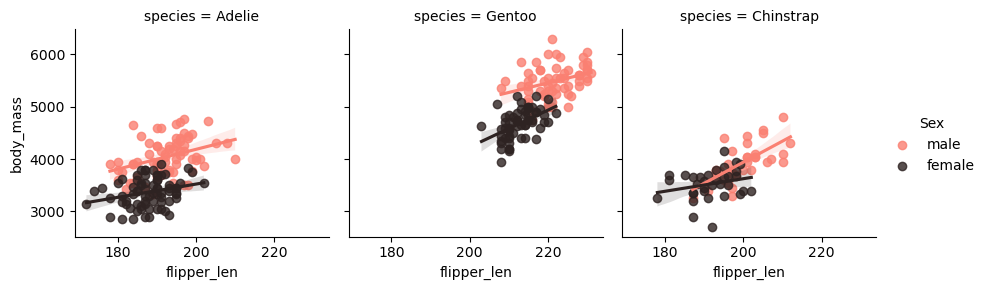

In [45]:
g = sn.FacetGrid(penguins, col="species", hue="sex", palette="dark:salmon_r")
g.map(sn.regplot, "flipper_len", "body_mass")
g.add_legend(title="Sex")

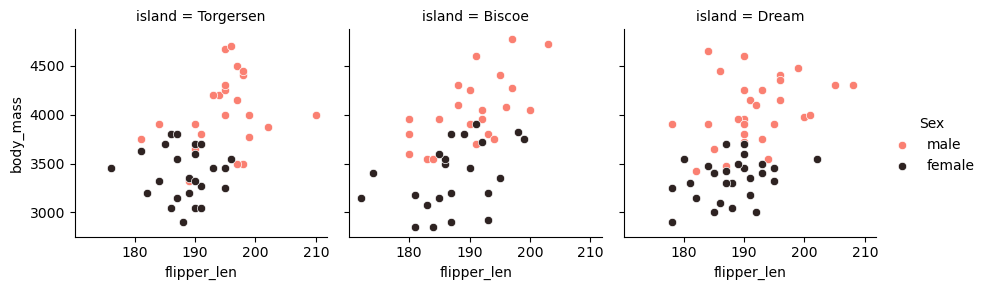

In [22]:
adelie_penguins = penguins[penguins["species"] == "Adelie"]

g = sn.FacetGrid(adelie_penguins, col="island", hue="sex", palette="dark:salmon_r")
g.map(sn.scatterplot, "flipper_len", "body_mass", legend=True)
g.add_legend(title="Sex")

plt.show()

## How has body mass changed throughout the years?

<Axes: xlabel='year', ylabel='body_mass'>

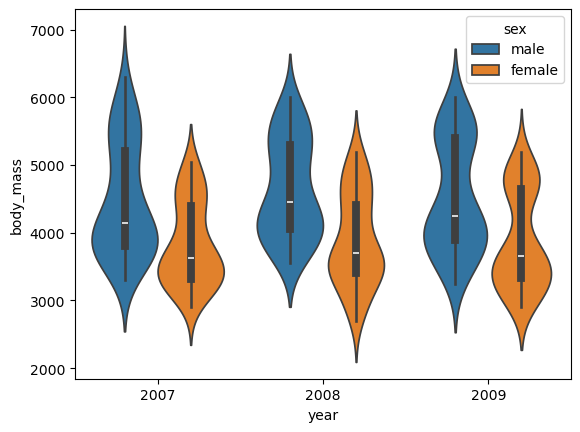

In [33]:
sn.violinplot(penguins, x="year", y="body_mass", hue="sex", )